# COVER TYPE ANALYSIS - Multi-Class Classification and Feature Selection Notebook + Decision Tree

SharpestMinds Project by Angela Teng with the mentorship of Jeremie Harris

**Completed:** 
- Loading data + importing libraries 
- Exploratory Data Analysis 

**To Do:**
- Data Cleaning 
- Feature Selection 
- Dimensionality Reduction 
- Modeling 
- Analysis 
- Polish 

## Importing Libraries + Loading Data

In [1]:
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

#import sklearn.cross_validation as cross_validation
#from sklearn.cross_validation import train_test_split
import sklearn.model_selection as model_selection
from sklearn import linear_model

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

import mca

from sklearn.neighbors import KNeighborsClassifier

from random import sample

In [2]:
import os
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Scripts'

In [3]:
os.chdir('/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Data')
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Data'

In [4]:
data = open("covtype.data")
data

<_io.TextIOWrapper name='covtype.data' mode='r' encoding='UTF-8'>

In [5]:
data = pd.read_csv("covtype.data", header=None)
#interesting that read csv also works on .data files! 

In [6]:
# set column names 
cols = ['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 
       'vertical_distance_to_hydrology', 'Horizontal_Distance_To_Roadways', 
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
       'Soil_Type_1',
        'Soil_Type_2',
        'Soil_Type_3',
        'Soil_Type_4',
        'Soil_Type_5',
        'Soil_Type_6',
        'Soil_Type_7',
        'Soil_Type_8',
        'Soil_Type_9',
        'Soil_Type_10',
        'Soil_Type_11',
        'Soil_Type_12',
        'Soil_Type_13',
        'Soil_Type_14',
        'Soil_Type_15',
        'Soil_Type_16',
        'Soil_Type_17',
        'Soil_Type_18',
        'Soil_Type_19',
        'Soil_Type_20',
        'Soil_Type_21',
        'Soil_Type_22',
        'Soil_Type_23',
        'Soil_Type_24',
        'Soil_Type_25',
        'Soil_Type_26',
        'Soil_Type_27',
        'Soil_Type_28',
        'Soil_Type_29',
        'Soil_Type_30',
        'Soil_Type_31',
        'Soil_Type_32',
        'Soil_Type_33',
        'Soil_Type_34',
        'Soil_Type_35',
        'Soil_Type_36',
        'Soil_Type_37',
        'Soil_Type_38',
        'Soil_Type_39',
        'Soil_Type_40', 
       'Cover_Type']
#cols

In [7]:
data.columns = cols
data.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


**Goal: predict cover type given the other variables (7 cover types )**

In [8]:
#plotting multiple binary categorical variables?
data.groupby('Cover_Type').describe()

elevation                                                    \
               count         mean         std     min      25%     50%   
Cover_Type                                                               
1           211840.0  3128.644888  157.805543  2466.0  3033.00  3146.0   
2           283301.0  2920.936061  186.579366  2142.0  2794.00  2935.0   
3            35754.0  2394.509845  196.732427  1859.0  2260.25  2404.0   
4             2747.0  2223.939934  102.524587  1988.0  2142.00  2231.0   
5             9493.0  2787.417571   96.594047  2482.0  2732.00  2796.0   
6            17367.0  2419.181897  188.762292  1863.0  2320.00  2428.0   
7            20510.0  3361.928669  106.915301  2868.0  3299.25  3363.0   

                              aspect              ... Soil_Type_39       \
               75%     max     count        mean  ...          75%  max   
Cover_Type                                        ...                     
1           3235.0  3686.0  211840.0  156.138227  ...          0.0  1.0   
2           3042.0  3433.0  283301.0  152.060515  ...          0.0  1.0   
3           2549.0  2899.0   35754.0  176.372490  ...          0.0  0.0   
4           2304.0  2526.0    2747.0  137.139425  ...          0.0  0.0   
5           2857.0  3011.0    9493.0  139.283051  ...          0.0  0.0   
6           2544.0  2900.0   17367.0  180.539068  ...          0.0  0.0   
7           3409.0  3858.0   20510.0  153.236226  ...          1.0  1.0   

           Soil_Type_40                                               
                  count      mean       std  min  25%  50%  75%  max  
Cover_Type                                                            
1              211840.0  0.022781  0.149206  0.0  0.0  0.0  0.0  1.0  
2              283301.0  0.001172  0.034213  0.0  0.0  0.0  0.0  1.0  
3               35754.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
4                2747.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
5                9493.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
6               17367.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
7               20510.0  0.175134  0.380091  0.0  0.0  0.0  0.0  1.0  

[7 rows x 432 columns]

In [9]:
#create dummy variables for multiclass predictor
cov_dummy = pd.get_dummies(data['Cover_Type'])
cov_dummy.head()

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


In [10]:
df4 = pd.concat([cov_dummy, data], axis = 1)
df4.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,0,0,0,0,1,0,0,2596,51,3,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,1,0,0,2590,56,2,...,0,0,0,0,0,0,0,0,0,5
2,0,1,0,0,0,0,0,2804,139,9,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,2785,155,18,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,1,0,0,2595,45,2,...,0,0,0,0,0,0,0,0,0,5


In [11]:
#variable importance by correlation
cov_type_corr = data.corr()['Cover_Type'][:-1]

In [12]:
golden_features_list = cov_type_corr[abs(cov_type_corr) > 0.1].sort_values(ascending=False)
print("There are {} somewhat correlated values with Cover Type:\n{}".format(len(golden_features_list), golden_features_list))

There are 15 somewhat correlated values with Cover Type:
Wilderness_Area_4                     0.323200
Soil_Type_10                          0.243876
Soil_Type_38                          0.160170
Soil_Type_39                          0.155668
slope                                 0.148285
Soil_Type_40                          0.128351
Soil_Type_2                           0.118135
Soil_Type_6                           0.112958
Horizontal_Distance_To_Fire_Points   -0.108936
Soil_Type_29                         -0.124933
Soil_Type_23                         -0.135055
Soil_Type_22                         -0.141746
Horizontal_Distance_To_Roadways      -0.153450
Wilderness_Area_1                    -0.203913
elevation                            -0.269554
Name: Cover_Type, dtype: float64


## Sampling the Population

In [13]:
# do you sample before you normalize? and log transform? or after

- df4 = dataframe with all variables, including cover_type and cover_type OHE
- df_dummy = df with only dummy vars, no cover_type
- data - raw data 

**- trying 2 different sampling methods here, one more manual and one using make_imbalance**

In [14]:
#dataframe with dummy variables for covertype
df4.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,0,0,0,0,1,0,0,2596,51,3,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,1,0,0,2590,56,2,...,0,0,0,0,0,0,0,0,0,5
2,0,1,0,0,0,0,0,2804,139,9,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,2785,155,18,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,1,0,0,2595,45,2,...,0,0,0,0,0,0,0,0,0,5


#### Before sampling the data, we should normalize it. (Or should we standardize it? https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc) 

- also, should we use mean normalization or min-max normalization? 

In [15]:
from sklearn import preprocessing
import numpy as np


In [16]:
df4_column_names = list(df4.columns)
df4_column_names.remove('Cover_Type')
#df4_column_names

In [17]:
# Normalize all columns

x = df4.loc[:, df4.columns != 'Cover_Type'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(data=x_scaled, columns=df4_column_names)
#df_normalized.loc[:,:] = x_scaled

#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(df) 
#df.loc[:,:] = scaled_values
#x_array = np.array(df['total_bedrooms'])
#normalized_X = preprocessing.normalize([x_array])

In [18]:
df_normalized.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368684,0.141667,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.365683,0.155556,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.472736,0.386111,0.136364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.463232,0.430556,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368184,0.125000,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#append Y axis babck to this 
df_normalized_w_target = pd.concat([df_normalized, df4['Cover_Type']], axis=1)
df_normalized_w_target.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368684,0.141667,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.365683,0.155556,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.472736,0.386111,0.136364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.463232,0.430556,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368184,0.125000,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [20]:
df_normalized_w_target.shape

(581012, 62)

#### From here, we now have normalized data. We can then take a random sample, with the make_imbalance function. 

In [21]:
df_dummy = df_normalized_w_target
df_dummy = df_dummy.drop(['Cover_Type'], axis=1)
df_dummy.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368684,0.141667,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.365683,0.155556,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.472736,0.386111,0.136364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.463232,0.430556,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368184,0.125000,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#sanity check
#df_dummy.columns

### Multi class classification with undersampling

In [23]:

from collections import Counter


from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

print(__doc__)

Using TensorFlow backend.


Automatically created module for IPython interactive environment


In [24]:
RANDOM_STATE = 42

In [25]:
# set target data  and x values
X=df_normalized_w_target[list(df_normalized_w_target.columns)[7:-1]]
print(X.shape)
X.head()

(581012, 54)


,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
Y=df_normalized_w_target[list(df_normalized_w_target.columns)[-1]]
print(Y.shape)
Y.head()
#Y

(581012,)


0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [27]:
df_normalized_w_target.Cover_Type.unique()

array([5, 2, 1, 7, 3, 6, 4])

In [28]:
df_normalized_w_target.groupby('Cover_Type').describe()

1                                            2       ...  \
               count mean  std  min  25%  50%  75%  max     count mean  ...   
Cover_Type                                                              ...   
1           211840.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  211840.0  0.0  ...   
2           283301.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  283301.0  1.0  ...   
3            35754.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   35754.0  0.0  ...   
4             2747.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    2747.0  0.0  ...   
5             9493.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    9493.0  0.0  ...   
6            17367.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   17367.0  0.0  ...   
7            20510.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   20510.0  0.0  ...   

           Soil_Type_39      Soil_Type_40                                     \
                    75%  max        count      mean       std  min  25%  50%   
Cover_Type                                                                     
1                   0.0  1.0     211840.0  0.022781  0.149206  0.0  0.0  0.0   
2                   0.0  1.0     283301.0  0.001172  0.034213  0.0  0.0  0.0   
3                   0.0  0.0      35754.0  0.000000  0.000000  0.0  0.0  0.0   
4                   0.0  0.0       2747.0  0.000000  0.000000  0.0  0.0  0.0   
5                   0.0  0.0       9493.0  0.000000  0.000000  0.0  0.0  0.0   
6                   0.0  0.0      17367.0  0.000000  0.000000  0.0  0.0  0.0   
7                   1.0  1.0      20510.0  0.175134  0.380091  0.0  0.0  0.0   

                      
            75%  max  
Cover_Type            
1           0.0  1.0  
2           0.0  1.0  
3           0.0  0.0  
4           0.0  0.0  
5           0.0  0.0  
6           0.0  0.0  
7           0.0  1.0  

[7 rows x 488 columns]

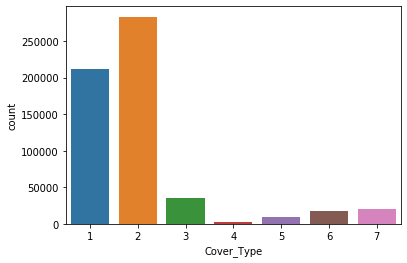

In [29]:
sns.countplot(df_normalized_w_target['Cover_Type'])

In [30]:
#sample the data, 1000 per output
X, y = make_imbalance(X, Y,
                      sampling_strategy={1: 1000, 2: 1000, 3: 1000, 4:1000, 5:1000, 6:1000, 7:1000},
                      random_state=RANDOM_STATE)

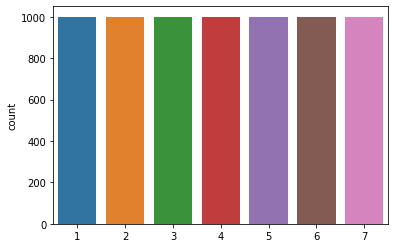

In [31]:
sns.countplot(y)

In [32]:
sp.stats.describe(X)

DescribeResult(nobs=7000, minmax=(array([0.00850425, 0.        , 0.        , 0.        , 0.06976744,
       0.        , 0.28740157, 0.38188976, 0.        , 0.00418235,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ]), array([0.9989995 , 1.        , 0.77272727, 0.94488189, 0.75581395,
       0.97442743, 1.        , 1.        , 0.98818898, 0.96612296,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.     

### Split into Training and Testing

In [33]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

In [34]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({3: 767, 5: 766, 7: 764, 6: 752, 1: 738, 4: 733, 2: 730})
Testing target statistics: Counter({2: 270, 4: 267, 1: 262, 6: 248, 7: 236, 5: 234, 3: 233})


### Feature Selection for SVM

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters=7)
#since we have 7 cover types

In [42]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
kmeans.cluster_centers_
#not sure how to interpret this

array([[ 2.08244658e-01,  5.81639048e-01,  3.61608436e-01,
         1.19298250e-01,  3.02249001e-01,  1.10592928e-01,
         6.83737071e-01,  7.86076693e-01,  6.14534560e-01,
         1.10845083e-01,  5.55111512e-16, -6.24500451e-17,
         2.66453526e-15,  1.00000000e+00,  1.73472348e-17,
        -5.55111512e-17, -4.16333634e-16, -5.55111512e-16,
        -2.25514052e-17,  2.35922393e-16,  0.00000000e+00,
         3.19839641e-18,  6.39679282e-18,  1.00000000e+00,
        -3.33066907e-16, -2.32452946e-16, -2.81025203e-16,
         6.76542156e-17,  0.00000000e+00, -3.46944695e-17,
         2.98372438e-16, -1.25767452e-17,  8.23993651e-18,
        -3.46944695e-17,  1.18178037e-17, -1.28369537e-16,
         5.62050406e-16,  7.45931095e-17,  1.59919820e-18,
         4.72712147e-17,  1.59919820e-18, -2.16840434e-18,
         5.68989300e-16,  6.10622664e-16,  5.55111512e-17,
        -5.55111512e-17,  2.28983499e-16, -2.90566182e-17,
         5.11743425e-17,  1.18178037e-17, -2.42861287e-1

In [45]:
kmeans.labels_

array([2, 5, 1, ..., 0, 0, 5], dtype=int32)

In [50]:
#how do we visualize this? 